# Data prep for Coronavirus Dataset

### Credits 
## "JHU CSSE COVID-19 Data"
 - https://github.com/CSSEGISandData/COVID-19
 
 ### Task
 - Data Cleaning
 - Analysis

In [1]:
import pandas as pd
import geopandas as gpd
import descartes

#Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_confirmed = pd.read_csv('time_series_covid19_confirmed_global.csv')
df_death = pd.read_csv('time_series_covid19_deaths_global.csv')
df_recovered = pd.read_csv('time_series_covid19_recovered_global.csv')

In [3]:
print(df_confirmed.shape)
print(df_death.shape)
print(df_recovered.shape)

(266, 225)
(266, 225)
(253, 225)


In [4]:
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


In [5]:
df_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1385,1385,1385,1387,1389,1397,1401,1401,1402,1402
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,238,240,245,250,254,259,263,266,271,275
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,1411,1418,1424,1435,1446,1456,1465,1475,1483,1491
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,53,53,53,53,53,53,53,53,53,53
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,93,94,94,96,100,102,103,105,106,107


In [6]:
df_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,27681,28016,28016,28180,28360,28440,29042,29046,29059,29063
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3986,4096,4184,4332,4413,4530,4633,4791,4923,5020
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,28281,28587,28874,29142,29369,29587,29886,30157,30436,30717
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,875,875,875,875,877,877,893,893,902,902
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,742,804,814,818,877,977,977,1335,1028,1041


In [7]:
df_confirmed.shape

(266, 225)

In [8]:
df_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '8/20/20', '8/21/20', '8/22/20', '8/23/20', '8/24/20', '8/25/20',
       '8/26/20', '8/27/20', '8/28/20', '8/29/20'],
      dtype='object', length=225)

In [9]:
confirm_df = df_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])

In [10]:
confirm_df

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Afghanistan,33.939110,67.709953,1/22/20,0
1,NaN,Albania,41.153300,20.168300,1/22/20,0
2,NaN,Algeria,28.033900,1.659600,1/22/20,0
3,NaN,Andorra,42.506300,1.521800,1/22/20,0
4,NaN,Angola,-11.202700,17.873900,1/22/20,0
...,...,...,...,...,...,...
58781,NaN,West Bank and Gaza,31.952200,35.233200,8/29/20,21668
58782,NaN,Western Sahara,24.215500,-12.885800,8/29/20,10
58783,NaN,Yemen,15.552727,48.516388,8/29/20,1946
58784,NaN,Zambia,-13.133897,27.849332,8/29/20,11902


In [11]:
confirm_df.rename(columns={"Province/State":"state","Country/Region":"country","variable":"date","value":"confirmed"},inplace=True)

In [12]:
confirm_df.head()

,state,country,Lat,Long,date,confirmed
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [13]:
confirm_df.shape

(58786, 6)

In [14]:
confirm_df.tail()

,state,country,Lat,Long,date,confirmed
58781,NaN,West Bank and Gaza,31.952200,35.233200,8/29/20,21668
58782,NaN,Western Sahara,24.215500,-12.885800,8/29/20,10
58783,NaN,Yemen,15.552727,48.516388,8/29/20,1946
58784,NaN,Zambia,-13.133897,27.849332,8/29/20,11902
58785,NaN,Zimbabwe,-19.015438,29.154857,8/29/20,6406


In [15]:
#Melt funcion to create for other two cases
def get_n_melt_data(df_name,case_type):
    melted_df = df_name.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
    melted_df.rename(columns={"Province/State":"state","Country/Region":"country","variable":"date","value":case_type},inplace=True)
    return melted_df

In [16]:
#Fetch Death and Recovered
recovered_df = get_n_melt_data(df_recovered,'recovered')
death_df = get_n_melt_data(df_death,'death')

In [17]:
recovered_df.head()

,state,country,Lat,Long,date,recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [18]:
death_df.head()

,state,country,Lat,Long,date,death
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0


In [19]:
death_df.tail()

,state,country,Lat,Long,date,death
58781,NaN,West Bank and Gaza,31.952200,35.233200,8/29/20,147
58782,NaN,Western Sahara,24.215500,-12.885800,8/29/20,1
58783,NaN,Yemen,15.552727,48.516388,8/29/20,563
58784,NaN,Zambia,-13.133897,27.849332,8/29/20,284
58785,NaN,Zimbabwe,-19.015438,29.154857,8/29/20,196


In [20]:
recovered_df.tail()

,state,country,Lat,Long,date,recovered
55908,NaN,West Bank and Gaza,31.952200,35.233200,8/29/20,14631
55909,NaN,Western Sahara,24.215500,-12.885800,8/29/20,8
55910,NaN,Yemen,15.552727,48.516388,8/29/20,1113
55911,NaN,Zambia,-13.133897,27.849332,8/29/20,11092
55912,NaN,Zimbabwe,-19.015438,29.154857,8/29/20,5056


In [21]:
#Shape
death_df.shape
recovered_df.shape

(55913, 6)

In [22]:
print(confirm_df.shape)
print(death_df.shape)
print(recovered_df.shape)

(58786, 6)
(58786, 6)
(55913, 6)


# merging and Joining


In [23]:
new_df = confirm_df.join(recovered_df['recovered'])

In [24]:
new_df.head()

,state,country,Lat,Long,date,confirmed,recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0.0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0.0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0.0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0.0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0.0


In [25]:
new_df.iloc[55555]

state              NaN
country      Sri Lanka
Lat            7.87305
Long           80.7718
date           8/17/20
confirmed         2900
recovered         4260
Name: 55555, dtype: object

In [26]:
final_df = confirm_df.join(recovered_df['recovered']).join(death_df['death'])

In [27]:
final_df.head()

,state,country,Lat,Long,date,confirmed,recovered,death
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0.0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0.0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0.0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0.0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0.0,0


In [28]:
final_df.shape

(58786, 8)

In [29]:
new_df = confirm_df.join(recovered_df['recovered'])

In [30]:
new_df.head()

,state,country,Lat,Long,date,confirmed,recovered
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0.0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0.0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0.0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0.0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0.0


In [31]:
final_df = confirm_df.join(recovered_df['recovered']).join(death_df['death'])

In [32]:
final_df.head()

,state,country,Lat,Long,date,confirmed,recovered,death
0,NaN,Afghanistan,33.93911,67.709953,1/22/20,0,0.0,0
1,NaN,Albania,41.15330,20.168300,1/22/20,0,0.0,0
2,NaN,Algeria,28.03390,1.659600,1/22/20,0,0.0,0
3,NaN,Andorra,42.50630,1.521800,1/22/20,0,0.0,0
4,NaN,Angola,-11.20270,17.873900,1/22/20,0,0.0,0


In [33]:
final_df.iloc[55555]

state              NaN
country      Sri Lanka
Lat            7.87305
Long           80.7718
date           8/17/20
confirmed         2900
recovered         4260
death               11
Name: 55555, dtype: object

In [34]:
#save_data
final_df.to_csv('Coronavirus_updated_dataset.csv')

### GeoSpatial

In [35]:
final_df.columns

Index(['state', 'country', 'Lat', 'Long', 'date', 'confirmed', 'recovered',
       'death'],
      dtype='object')

In [36]:
gdf01 = gpd.GeoDataFrame(final_df,geometry=gpd.points_from_xy(final_df['Long'],final_df['Lat']))

In [38]:
?gdf01.plot

<AxesSubplot:>

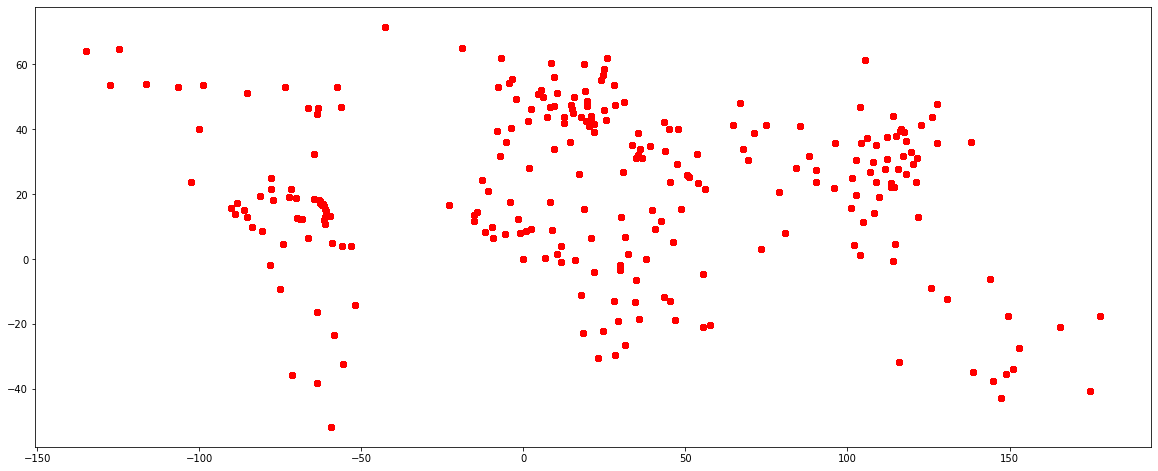

In [39]:
gdf01.plot(figsize=(20,10),color='red')

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

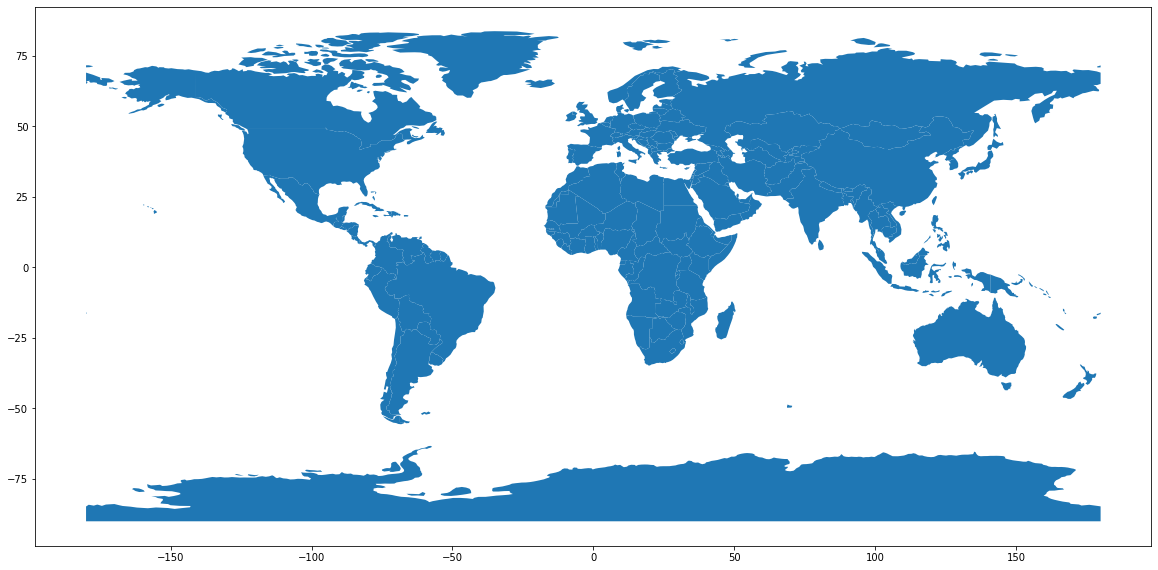

In [43]:
#Overlapping with world Map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('on')

<AxesSubplot:>

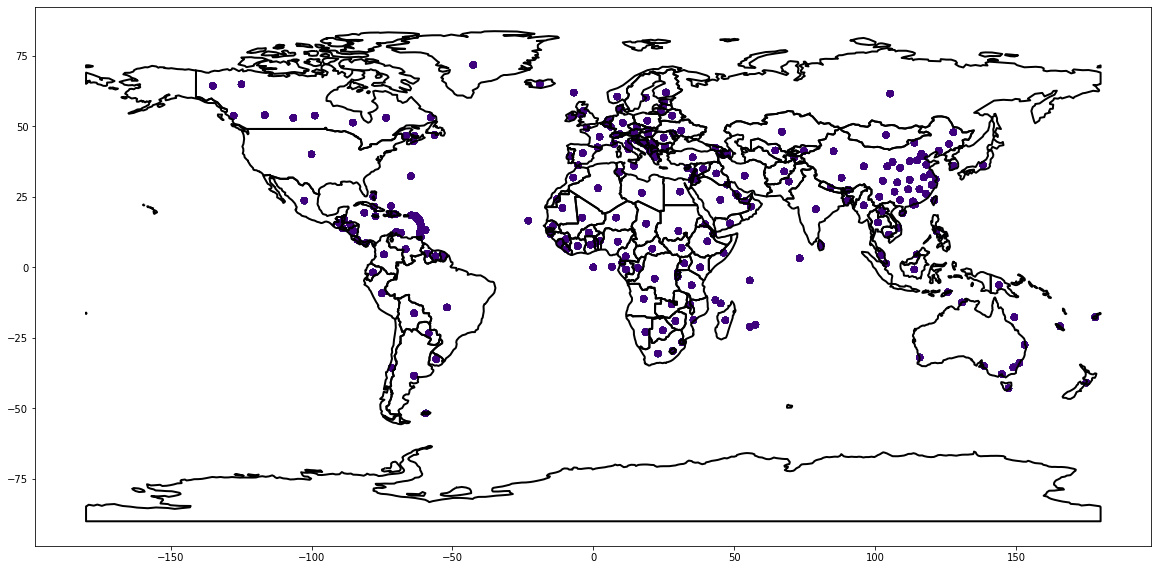

In [48]:
#overlap with data
fig,ax = plt.subplots(figsize=(20,10))
gdf01.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)